In [35]:
import pandas as pd
import numpy as np
import re
import tqdm
from matplotlib import  pyplot as plt 


In [36]:
import nltk
from nltk import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EMZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EMZ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df_dialect=pd.read_csv("C:\\Users\\EMZ\\Desktop\\JeelAIDM\\NLP\\selected_dialects.csv", encoding = "utf-8")

In [4]:
df_dialect.head(3)

,dialect,clean_text,no_stopw
0,EG,الاقيش معاك الف يا عم نجيب قرض حسن ابدا بيهم ...,الاقيش معاك الف عم نجيب قرض حسن ابدا بيهم حلمي...
1,EG,وهو انت لو بتفهم كنت بقيت زملكاوي,انت بتفهم بقيت زملكاوي
2,EG,ولولوا عليك ساعة وسكتوا,ولولوا ساعة وسكتوا


In [7]:
df_dialect.isnull().sum()

dialect       0
clean_text    0
no_stopw      7
dtype: int64

In [9]:
df_dialect= df_dialect.dropna()

In [10]:
df_dialect['clean_text'] = df_dialect['clean_text'].apply(lambda x: re.sub(r'(.)\1+', r'\1\1',x)) #remove longation
df_dialect['no_stopw'] = df_dialect['no_stopw'].apply(lambda x: re.sub(r'(.)\1+', r'\1\1',x)) #remove longation


In [11]:
my_stop =  ['أن','أنا','أنت','أنتم','أنه','أهلا','أو','بس','و','إذا','إلى','احد','هم','هو','هي','من','في','على','لما','حتى','انت','او','مع','من','فى','او','ان','انا','انت','انتم','شاء','فى','اهلا','الله','هه']

In [12]:
stop_words = stopwords.words('arabic')

In [13]:
file=open("C:\\Users\\EMZ\\Desktop\\JeelAIDM\\NLP\\dialectal_stopwords_405.txt",'r')

In [14]:
file_content=file.read()

In [15]:
stop_words2=file_content.split("\n")

In [16]:
newstop = my_stop + stop_words2

In [17]:
df_dialect['wto_stopw']= df_dialect['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (newstop)]))

In [18]:
df_dialect.sample(4)

,dialect,clean_text,no_stopw,wto_stopw
8658,EG,كل سنه وانتوا طيبين بمناسبة رمضان وبالمناسبة د...,سنه وانتوا طيبين بمناسبة رمضان وبالمناسبة انا ...,كل سنه وانتوا طيبين بمناسبة رمضان وبالمناسبة د...
3004,EG,كلام مش هيعجب حد لكن هقولهمتابعى فيديوهات محمد...,كلام هيعجب هقولهمتابعى فيديوهات محمد يريدون ال...,كلام مش هيعجب حد لكن هقولهمتابعى فيديوهات محمد...
1570,EG,كل واحد فيهم ماسك مستقل بذاته فين الصعوبة,فيهم ماسك مستقل بذاته الصعوبة,كل واحد فيهم ماسك مستقل بذاته فين الصعوبة
16561,SA,خير يا محنكين زمانكم الحين صار الاهليمايقدر ي...,محنكين زمانكم الاهليمايقدر يفوز الهلال لهذي ال...,خير يا محنكين زمانكم الحين صار الاهليمايقدر يف...


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()


In [20]:
X = vectorizer.fit_transform(df_dialect["wto_stopw"])

In [21]:
X2 = vectorizer.fit_transform(df_dialect["clean_text"])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,df_dialect["dialect"],test_size=0.2,random_state=42)

In [23]:
from sklearn.svm import SVC 

base_line_model= SVC(kernel='rbf').fit(X_train,y_train)

In [24]:
y_pred= base_line_model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test,y_pred)

0.8476412735455909

In [27]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0,5)):
  
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '-', color="g",
             label="Cross-validation score")

    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');
    return plt

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import validation_curve




def summarize_model_result(model, model_name, X_train, X_test, y_train, y_test, cv ):

  y_pred = model.predict(X_test)

  test_accuracy = accuracy_score(y_test, y_pred)
  print("\n testing accuracy :  "  ,test_accuracy,"\n")
  print("----------------------------------------------------------------------------------------------")

 
  print(classification_report(y_test, y_pred))

  # print Confusion Matrix
  print('\nConfusion Matrix:\n')
  plot_confusion_matrix(model, X_test, y_test, xticks_rotation='vertical')
 
  plot_learning_curve(model,"Learning Curve of "+ model_name,X_train, y_train, ylim=(0, 1.1), cv=cv, n_jobs=8)

  print("----------------------------------------------------------------------------------------------")


 testing accuracy :   0.8476412735455909 

----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

          EG       0.91      0.85      0.88      1985
          MA       0.92      0.75      0.83      2031
          SA       0.76      0.94      0.84      1983

    accuracy                           0.85      5999
   macro avg       0.86      0.85      0.85      5999
weighted avg       0.86      0.85      0.85      5999


Confusion Matrix:



C:\Users\EMZ\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


----------------------------------------------------------------------------------------------


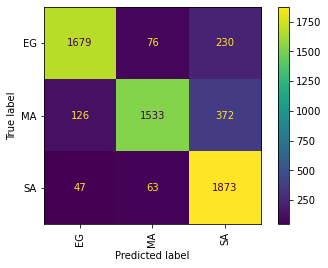

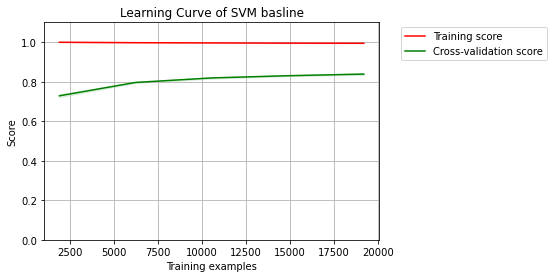

In [29]:
summarize_model_result(base_line_model, "SVM basline", X_train, X_test, y_train, y_test, 5 )

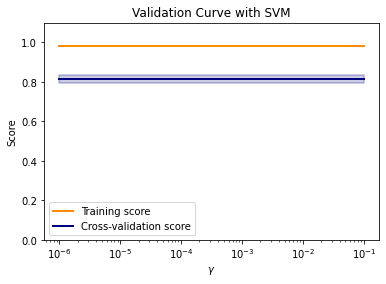

In [30]:
from sklearn.model_selection import validation_curve


# Setting the range for the parameter (from 1 to 10)
parameter_range = np.logspace(-6, -1, 5)

# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(SVC(kernel="linear"), X, df_dialect['dialect'],
									param_name = "gamma",
									param_range = parameter_range,
										cv = 5, scoring = "accuracy")

train_scores_mean = np.mean(train_score, axis=1)
train_scores_std = np.std(train_score, axis=1)
test_scores_mean = np.mean(test_score, axis=1)
test_scores_std = np.std(test_score, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.xticks(np.arange(1,10))
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    parameter_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    parameter_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    parameter_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    parameter_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

In [31]:
base_line_model.predict(["مفيش اخبار جديدة"])

ValueError: could not convert string to float: 'مفيش اخبار جديدة'

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
X2_train, X2_test, y_train,y_test = train_test_split(df_dialect["wto_stopw"],df_dialect["dialect"],test_size=0.2,random_state=42)
tf_svm=Pipeline([
    ('tf',TfidfVectorizer()),
    ("svm",SVC())
])
tf_svm.fit(X2_train,y_train)

Pipeline(steps=[('tf', TfidfVectorizer()), ('svm', SVC())])

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
def summarize_model_result(model):
  y_pred=model.predict(X2_test)
  print("\t\tClassification Report")
  print(classification_report(y_test, y_pred))
  print('\nConfusion Matrix:\n')
  print(confusion_matrix(y_test, y_pred))
  print("----------------------------------------------------------------------------------------------")
  plot_confusion_matrix(model, X2_test, y_test, xticks_rotation='vertical')

		Classification Report
              precision    recall  f1-score   support

          EG       0.89      0.87      0.88      1985
          MA       0.91      0.77      0.83      2031
          SA       0.78      0.93      0.85      1983

    accuracy                           0.85      5999
   macro avg       0.86      0.86      0.85      5999
weighted avg       0.86      0.85      0.85      5999


Confusion Matrix:

[[1722   74  189]
 [ 141 1559  331]
 [  62   75 1846]]
----------------------------------------------------------------------------------------------


C:\Users\EMZ\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


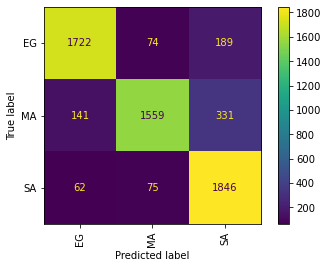

In [41]:
summarize_model_result(tf_svm)

In [42]:
tf_svm.predict(["يعطيكم العافية"])

array(['MA'], dtype=object)

In [43]:
tf_svm.predict(["ازيكم انهارده"])

array(['EG'], dtype=object)

In [44]:
import pickle
pickle.dump(tf_svm, open('dialect_model.sav', 'wb'))

In [45]:
loaded_model = pickle.load(open('dialect_model.sav', 'rb'))

In [46]:
loaded_model.predict(["عامل ايه انهارده"])[0]

'EG'

In [47]:
!pip install gradio

     -------------------------------------- 11.6/11.6 MB 455.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 84.5/84.5 kB 527.0 kB/s eta 0:00:00
     -------------------------------------- 55.4/55.4 kB 571.2 kB/s eta 0:00:00
     -------------------------------------- 56.6/56.6 kB 493.6 kB/s eta 0:00:00
     ------------------------------------ 101.4/101.4 kB 530.2 kB/s eta 0:00:00
     ------------------------------------ 198.9/198.9 kB 402.3 kB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 484.7 kB/s eta 0:00:00
     -------------------------------------- 54.9/54.9 kB 284.2 kB/s eta 0:00:00
     -------------------------------------- 84.8/84.8 kB 265.5 kB/s eta 0:00:00
     -------------------------------------- 63.6/63.6 kB 283.9 kB/s eta 0:00

In [48]:
import pickle
def dialect_pred(text):
  loaded_model = pickle.load(open('dialect_model.sav', 'rb'))
  return loaded_model.predict([text])[0]

In [49]:
import gradio as gr

demo = gr.Interface(fn=dialect_pred, inputs="text",outputs= ["text"])
demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x29a9a89ab50>, 'http://127.0.0.1:7860/', None)

In [50]:
!pip freeze>requirements.txt